<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/Association_rule_%E0%B8%A5%E0%B9%88%E0%B8%B2%E0%B8%AA%E0%B8%B8%E0%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ULckdresearch2023/LassoRegression_Feature.csv', index_col=0)
df.head()

,InPatient,Sex,Age,BMI,Systolic-BP,L2-BUN,L8-Uric,L9-Calcium,L10-Phosphorus,L11-Albumin,...,G1M4-Non-dihydropyridine-CCB,G4M3-Uricosuric-agent,D2-Diabetes-mellitus,D5-Systemic-sclerosis,D9-HCV-infection,D11-Heart-failure,D13-Kidney-stone,D14-Valvular-heart-disease,eGFR_t1,L1-eGFR
0,0,1,73,20.80,127.0,18.500,4.481,9.643,3.244,4.652,...,0,0,2,0,0,0,0,0,63.60,71.70
1,0,1,74,20.27,105.0,13.000,3.800,9.629,3.787,4.729,...,0,0,2,0,0,0,0,0,70.20,63.60
2,0,1,75,20.72,138.0,6.500,4.322,8.864,3.486,3.798,...,0,0,1,0,0,0,0,0,64.02,70.20
3,0,1,76,20.27,134.0,13.873,4.528,9.248,3.615,4.390,...,0,0,1,0,0,0,0,0,48.54,64.02
4,0,1,78,19.05,103.0,14.500,5.298,9.149,3.816,4.194,...,0,0,1,0,0,0,0,0,80.47,48.54


In [ ]:
df.columns

Index(['InPatient', 'Sex', 'Age', 'BMI', 'Systolic-BP', 'L2-BUN', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L15-Platelet',
       'L20-HbA1c', 'L22-Triglyceride', 'L23-LDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio', 'G1M5-Diuretic', 'G1M6-MRA',
       'G2M2-Metformin', 'G3M3-Fibrate', 'G5M1-Ketoanalog-amino-acid',
       'D1-Hypertension', 'D4-SLE', 'D6-Rheumatoid-arthritis',
       'D12-Thalassemia', 'D15-Solid-malignancy', 'Slopes', 'OutPatient',
       'BSA', 'L4-Sodium', 'L6-Chloride', 'L7-Bicarbonate', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L19-Blood-sugar', 'L24-HDL-Cholesterol',
       'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs', 'G1M3-Dihydropyridine-CCB',
       'G1M1-ACEI', 'G2M3-DPP4-inhibitor', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G4M2-Febuxostat',
       'G1M4-Non-dihydropyridine-CCB', 'G4M3-Uricosuric-agent',
       'D2-Diabetes-mellitus', 'D5-Systemic-sclerosis', 'D9-HCV-infection',
       'D11-H

In [ ]:
selected_columns = ['InPatient', 'OutPatient',
      'Sex', 'Age', 'BMI', 'BSA', 'Systolic-BP','Slopes',
    'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G3M3-Fibrate', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G4M2-Febuxostat', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G4M3-Uricosuric-agent',
    'D1-Hypertension', 'D2-Diabetes-mellitus','D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis',
       'D9-HCV-infection','D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
    'L1-eGFR', 'L2-BUN',
       'L4-Sodium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
df_selected = df[selected_columns]

In [ ]:
df_selected.shape

(52620, 55)

In [ ]:
df_selected.describe()

,InPatient,OutPatient,Sex,Age,BMI,BSA,Systolic-BP,Slopes,G1M2-ARB,G3M1-Statin,...,L12-Hemoglobin,L13-Hematocrit,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio
count,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,...,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000
mean,0.088027,0.868890,0.479932,66.812828,24.657083,1.656821,136.058107,-2.169255,8.887628,30.067104,...,12.435796,38.087801,7.279853,246.952447,120.499811,6.519305,139.219384,111.819297,52.145962,88.277345
std,0.283337,0.337524,0.499602,11.646585,3.652668,0.164151,17.253685,9.785498,27.112374,43.033413,...,1.671501,5.020433,2.276061,74.997597,49.196827,1.399190,72.447643,34.752885,12.711384,58.046303
min,0.000000,0.000000,0.000000,18.000000,11.120000,1.000000,60.000000,-79.002653,0.000000,0.000000,...,4.200000,0.000000,1.250000,31.000000,40.000000,4.000000,20.000000,10.000000,20.000000,0.000000
25%,0.000000,1.000000,0.000000,60.000000,22.370000,1.540000,126.000000,-6.381052,0.000000,0.000000,...,11.482000,35.300000,5.890000,202.000000,93.000000,5.600000,94.457500,89.000000,44.000000,39.822000
50%,0.000000,1.000000,0.000000,67.000000,24.467650,1.650000,136.000000,-1.706494,0.000000,0.000000,...,12.502000,38.458000,6.971500,241.000000,104.000000,6.045000,117.000000,110.000000,50.000000,76.425000
75%,0.000000,1.000000,1.000000,75.000000,26.560000,1.770000,146.000000,2.488436,0.000000,70.000000,...,13.600000,41.562000,8.200000,285.000000,131.402500,7.000000,166.490000,128.000000,59.780000,125.958250
max,1.000000,1.000000,1.000000,102.000000,49.430000,3.000000,200.000000,106.892857,365.000000,400.000000,...,19.400000,67.000000,29.900000,998.000000,989.000000,15.000000,856.000000,300.000000,196.000000,499.000000


In [ ]:
df_selected.head()

,InPatient,OutPatient,Sex,Age,BMI,BSA,Systolic-BP,Slopes,G1M2-ARB,G3M1-Statin,...,L12-Hemoglobin,L13-Hematocrit,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio
0,0,1,1,73,20.80,1.39,127.0,-7.158596,90,0,...,12.830,39.367,4.9248,194.24,91.0,5.284,81.0,123.0,99.0,21.019
1,0,1,1,74,20.27,1.38,105.0,5.550691,90,90,...,13.498,41.270,5.1634,251.46,86.0,5.755,64.0,146.0,73.0,15.198
2,0,1,1,75,20.72,1.38,138.0,-6.063710,100,100,...,10.100,32.400,9.4100,313.00,100.0,5.300,62.0,129.0,65.0,30.879
3,0,1,1,76,20.27,1.36,134.0,-12.812245,35,0,...,12.653,39.053,4.3718,204.65,89.0,5.562,69.0,139.0,76.0,36.916
4,0,1,1,78,19.05,1.33,103.0,28.287500,100,0,...,10.700,34.600,5.4200,434.00,88.0,5.500,74.0,129.0,60.0,28.684


##แบ่งข้อมูล

### Age

In [ ]:
df_selected['Age'].min()

18

In [ ]:
df_selected['Age'].max()

102

In [ ]:
#from pandas import cut

# Create bins and labels
#bins = [i for i in range(18, 108, 5)]  # Extend bins to include up to 102
#labels = [f"[{i},{i + 4})" for i in range(18, 103, 5)]  # Adjusted labels to match bins

# Apply the binning to the 'Age' column
#df_selected["age"] = df_selected.Age.apply(lambda x: -1 if x < 18 or x > 102 else x)
#df_selected["age"] = cut(df_selected["Age"], bins, right=False, labels=labels).astype(str)

In [ ]:
import pandas as pd

def binning(col, cut_points, labels=None):
    minval = col.min()
    maxval = col.max()
    cut_points = sorted(set(cut_points))
    break_points = [minval] + cut_points + [maxval]
    if not labels:
        labels = range(len(cut_points) + 1)
    colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True, duplicates='drop')
    return colBin

# Example cut points and labels
cut_points = [18, 65]
labels = ['Adult', 'Older']

# Assuming df_selected is your DataFrame and 'Age' is a column in it
# Replace df_selected['Age'] with your actual column name if different
df_selected['Age_range'] = binning(df_selected['Age'], cut_points, labels)

https://service-manual.nhs.uk/content/inclusive-content/age

###Slope

In [ ]:
def categorize_slope(slope):
    if slope < 0.75:
        return 'Stable and better'  # Slope ลดลงน้อยกว่า 0.75 ml/min/year
    elif slope > 5:
        return 'Worse'  # Slope ลดลงมากกว่า 5 ml/min/year
    elif 0.75 <= slope <= 5:
        return 'Between'  # Slope อยู่ระหว่าง 0.75 และ 5 ml/min/year #Intermediate
    else:
        return 'Out of range'  # กรณีที่ไม่อยู่ในช่วงที่กำหนด

# Assuming df_selected is your DataFrame and 'Slopes' is a column in it
# Replace df_selected['Slopes'] with your actual column name if different
df_selected['Slopes_Category'] = df_selected['Slopes'].apply(categorize_slope)

###Systolic BP

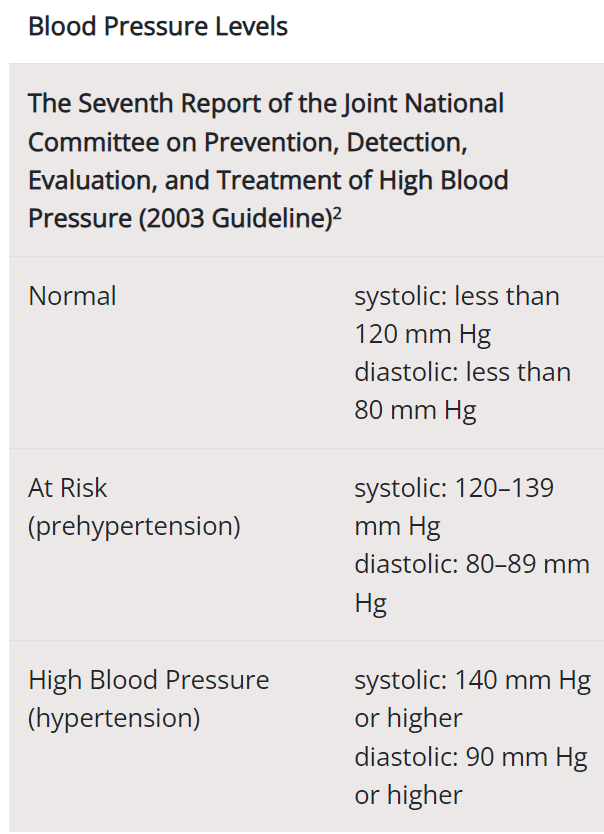

In [ ]:
import pandas as pd

def binning(col, cut_points, labels):
    minval = col.min()
    maxval = col.max()
    cut_points = sorted(set(cut_points))  # Sort the cut_points in ascending order
    break_points = [minval] + cut_points + [maxval]
    colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True)
    return colBin

# กำหนดค่าที่ต้องการแบ่งช่วง
cut_points = [119, 139]
labels = ['Normal', 'Risk', 'Hypertension']

# สมมติว่า df_selected เป็น DataFrame ของคุณและ 'Systolic-BP' เป็นชื่อคอลัมน์ที่ต้องการใช้
# แทน df_selected['Systolic-BP'] ด้วยชื่อคอลัมน์ของคุณ
df_selected['SBP'] = binning(df_selected['Systolic-BP'], cut_points, labels)

In [ ]:
df_selected[df_selected['Systolic-BP'] <= 120][['SBP', 'Systolic-BP']].head()

,SBP,Systolic-BP
1,Normal,105.0
4,Normal,103.0
9,Normal,116.0
14,Risk,120.0
64,Normal,116.0


แหล่งที่มา : https://www.cdc.gov/bloodpressure/about.htm

###BSA

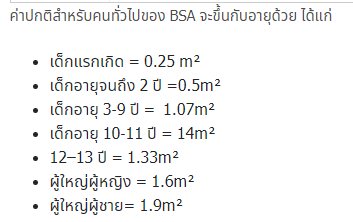

In [ ]:
df_selected['BSA'].describe()

count    52620.000000
mean         1.656821
std          0.164151
min          1.000000
25%          1.540000
50%          1.650000
75%          1.770000
max          3.000000
Name: BSA, dtype: float64

In [ ]:
def interpret_BSA_by_sex(BSA_value, sex):
    if sex == 0:  # Male
        if 1.9 <= BSA_value < 2.0:
            return "Normal"
        else:
            return "Abnormal"
    elif sex == 1:  # Female
        if 1.6 <= BSA_value < 1.7:
            return "Normal"
        else:
            return "Abnormal"

# Add a new column 'BSA_range' based on 'BSA' values and 'Sex'
df_selected['BSA_range'] = df_selected.apply(lambda row: interpret_BSA_by_sex(row['BSA'], row['Sex']), axis=1)

In [ ]:
df_selected[df_selected['BSA'] ==1.6][['BSA_range', 'BSA','Sex']].head()

,BSA_range,BSA,Sex
23,Normal,1.6,1
102,Abnormal,1.6,0
104,Abnormal,1.6,0
333,Normal,1.6,1
352,Abnormal,1.6,0


แหล่งที่มา : https://www.rxlist.com/body_surface_area/definition.htm ,
https://www.sciencedirect.com/science/article/abs/pii/S0026049505004373?via%3Dihub

###BMI

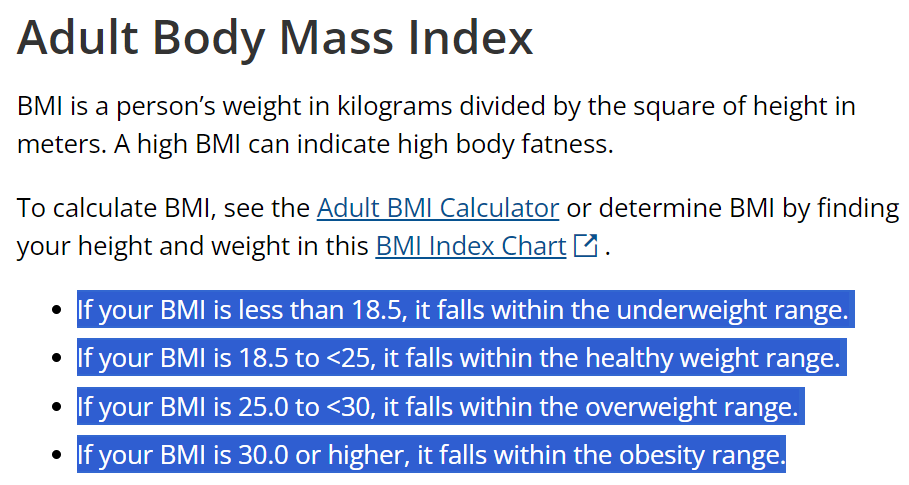

In [ ]:
def interpret_BMI(BMI_value):
    if BMI_value < 18.5:
        return 'Underweight'
    elif 18.5 <= BMI_value < 25:
        return 'Healthy weight'
    elif 25 <= BMI_value < 30:
        return 'Overweight'
    else:
        return 'Obesity'

# เพิ่มคอลัมน์ 'bmi' ที่บอกระดับของ 'interpret_BMI'
df_selected['BMI_range'] = df_selected['BMI'].apply(interpret_BMI)

แหล่งที่มา : https://www.cdc.gov/obesity/basics/adult-defining.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obesity%20range.

###eGFR

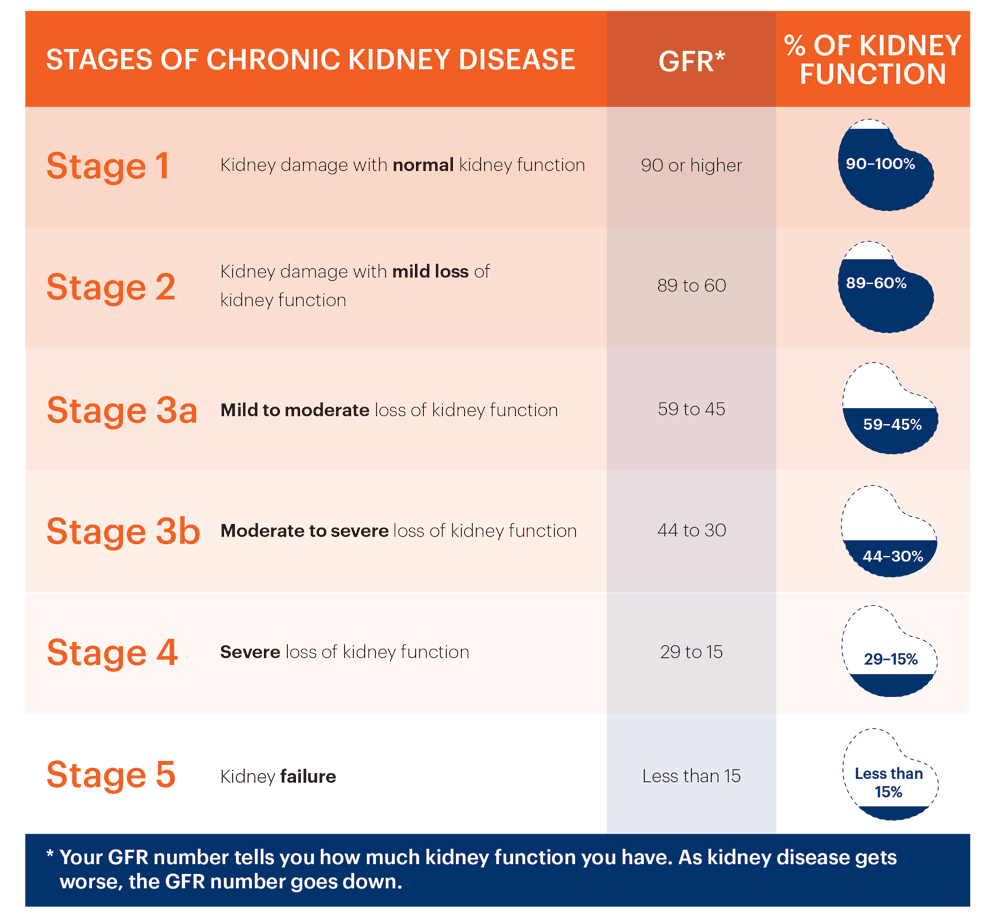

In [ ]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตามระดับ 'Recent_eGFR'
def categorize_eGFR(eGFR_value):
    if eGFR_value >= 90:
        return 'stage 1'
    elif 89.99 >= eGFR_value >= 60:
        return 'stage 2'
    elif 59.99 >= eGFR_value >= 45:
        return 'stage 3a'
    elif 44.99 >= eGFR_value >= 30:
        return 'stage 3b'
    elif 29.99 >= eGFR_value >= 15:
        return 'stage 4'
    else:
        return 'stage 5'

# เพิ่มคอลัมน์ 'eGFR_Category' ที่บอกระดับของ 'Recent_eGFR'
#df_selected['eGFR_t1_Category'] = df_selected['eGFR_t1'].apply(categorize_eGFR)
df_selected['eGFR_Category'] = df_selected['L1-eGFR'].apply(categorize_eGFR)

แหล่งที่มา : https://www.kidney.org/content/kidney-failure-risk-factor-estimated-glomerular-filtration-rate-egfr

###BUN

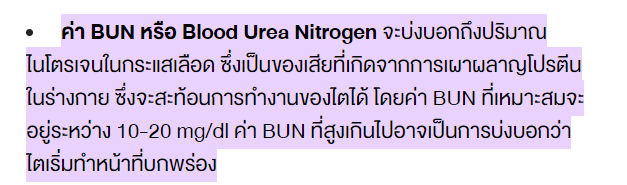

In [ ]:
def interpret_BUN(BUN_value):
    if BUN_value < 10:
        return 'Low'
    elif 10 <= BUN_value <= 20:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'BUN_level' based on 'BUN' values
df_selected['BUN'] = df_selected['L2-BUN'].apply(interpret_BUN)

แหล่งที่มา : https://hdmall.co.th/c/kidney-screening

###Creatinine

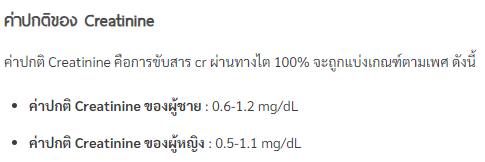

In [ ]:
#def interpret_creatinine_by_sex(creatinine_value, sex):
#   if sex == 0:  # Male
 #       if 0.6 <= creatinine_value <= 1.2:
 #           return 'Normal'
  #      elif creatinine_value < 0.6:
  #          return 'Low'
  #      else:
  #          return 'High'
  #  elif sex == 1:  # Female
  #      if 0.5 <= creatinine_value <= 1.1:
  #          return 'Normal'
 #       elif creatinine_value < 0.5:
  #          return 'Low'
 #       else:
  #          return 'High'

# Add a new column 'Creatinine_Interpretation' based on 'Creatinine' values and 'Sex'
#df_selected['Creatinine'] = df_selected.apply(lambda row: interpret_creatinine_by_sex(row['L3-Creatinine'], row['Sex']), axis=1)

แหล่งที่มา : https://www.samitivejchinatown.com/th/health-article/renal-function-test

###Sodium

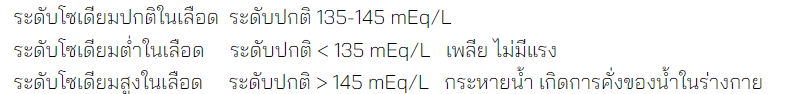

In [ ]:
def interpret_sodium(sodium_value):
    if sodium_value < 135:
        return 'Low'
    elif 135 <= sodium_value <= 145:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'sodium_level' based on 'L4-Sodium' values
df_selected['Sodium'] = df_selected['L4-Sodium'].apply(interpret_sodium)

แหล่งที่มา : https://sriphat.med.cmu.ac.th/th/knowledge-61#:~:text=%E0%B9%82%E0%B8%8B%E0%B9%80%E0%B8%94%E0%B8%B5%E0%B8%A2%E0%B8%A1%20%E0%B8%84%E0%B8%B7%E0%B8%AD%E0%B8%AD%E0%B8%B0%E0%B9%84%E0%B8%A3&text=%E0%B8%A3%E0%B8%B0%E0%B8%94%E0%B8%B1%E0%B8%9A%E0%B9%82%E0%B8%8B%E0%B9%80%E0%B8%94%E0%B8%B5%E0%B8%A2%E0%B8%A1%E0%B8%9B%E0%B8%81%E0%B8%95%E0%B8%B4%E0%B9%83%E0%B8%99%E0%B9%80%E0%B8%A5%E0%B8%B7%E0%B8%AD%E0%B8%94,%E0%B8%84%E0%B8%B1%E0%B9%88%E0%B8%87%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B8%99%E0%B9%89%E0%B8%B3%E0%B9%83%E0%B8%99%E0%B8%A3%E0%B9%88%E0%B8%B2%E0%B8%87%E0%B8%81%E0%B8%B2%E0%B8%A2

###Chloride

In [ ]:
def interpret_chloride(chloride_value):
    if chloride_value < 96:
        return 'Low'
    elif 96 <= chloride_value <= 106:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'chloride_level' based on 'L6-Chloride' values
df_selected['Chloride'] = df_selected['L6-Chloride'].apply(interpret_chloride)

แหล่งที่มา : https://www.mountsinai.org/health-library/tests/chloride-test-blood#:~:text=Normal%20Results,vary%20slightly%20among%20different%20laboratories.

###Bicarbonate

In [ ]:
def interpret_bicarbonate(bicarbonate_value):
    if bicarbonate_value < 22:
        return 'Low'
    elif 22 <= bicarbonate_value <= 29:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'bicarbonate_level' based on 'L7-Bicarbonate' values
df_selected['Bicarbonate'] = df_selected['L7-Bicarbonate'].apply(interpret_bicarbonate)

แหล่งที่มา : https://www.kidney.org/content/kidney-failure-risk-factor-serum-bicarbonate

###Uric

https://www.ucsfhealth.org/medical-tests/uric-acid----blood-

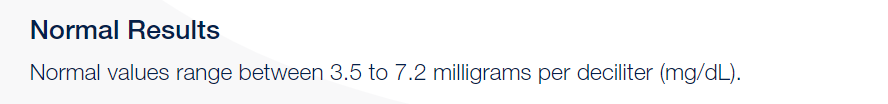

In [ ]:
def interpret_uric(uric_value):
     if uric_value < 3.5:
        return 'Low'
     elif 3.5 <= uric_value <= 7.2:
        return 'Normal'
     else:
        return 'High'

# Add a new column 'uric' based on 'L8-Uric' values
df_selected['Uric'] = df_selected['L8-Uric'].apply(interpret_uric)

###Calcium

https://www.ucsfhealth.org/medical-tests/calcium-blood-test#:~:text=Normal%20Results,or%20may%20test%20different%20specimens.

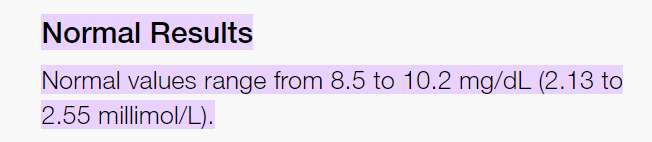

In [ ]:
def interpret_calcium(calcium_value):
    if calcium_value < 8.5:
        return 'Low'
    elif 8.5 <= calcium_value <= 10.2:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'calcium_level' based on 'L9-Calcium' values
df_selected['Calcium'] = df_selected['L9-Calcium'].apply(interpret_calcium)

###Phosphorus

https://www.ucsfhealth.org/medical-tests/phosphorus-blood-test

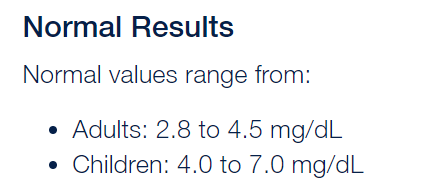

In [ ]:
def interpret_phosphorus(phosphorus_value):
    if phosphorus_value < 2.8:
        return 'Low'
    elif 2.8 <= phosphorus_value <= 4.5:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'phosphorus_level' based on 'L10-Phosphorus' values
df_selected['Phosphorus'] = df_selected['L10-Phosphorus'].apply(interpret_phosphorus)

###Albumin

https://www.ucsfhealth.org/medical-tests/albumin-blood-(serum)-test#:~:text=The%20normal%20range%20is%203.4,vary%20slightly%20among%20different%20laboratories.

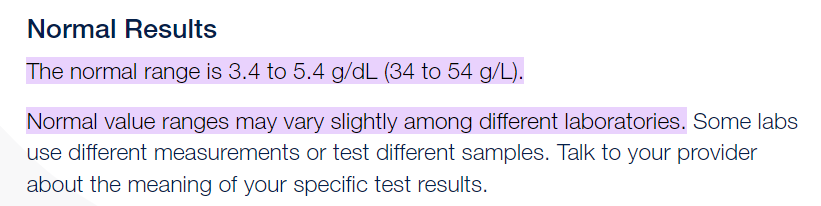

In [ ]:
def interpret_albumin(albumin_value):
    if albumin_value < 3.4:
        return 'Low'
    elif 3.4 <= albumin_value <= 5.4:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'albumin_level' based on 'L11-Albumin' values
df_selected['Albumin'] = df_selected['L11-Albumin'].apply(interpret_albumin)

###Hemoglobin

https://www.ucsfhealth.org/medical-tests/hemoglobin

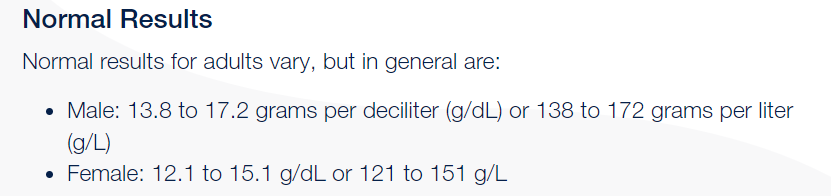

In [ ]:
def interpret_Hemoglobin_by_sex(Hemoglobin_value, sex):
    if sex == 0:  # Male
        if 13.8 <= Hemoglobin_value <= 17.2:
            return 'Normal'
        elif Hemoglobin_value < 13.8:
            return 'Low'
        else:
            return 'High'
    elif sex == 1:  # Female
        if 12.1 <= Hemoglobin_value <= 15.1:
            return 'Normal'
        elif Hemoglobin_value < 12.1:
            return 'Low'
        else:
            return 'High'

# Add a new column 'Hemoglobinl' based on 'L12-Hemoglobin' values and 'Sex'
df_selected['Hemoglobin'] = df_selected.apply(lambda row: interpret_Hemoglobin_by_sex(row['L12-Hemoglobin'], row['Sex']), axis=1)

###Hematocrit

https://www.redcrossblood.org/donate-blood/dlp/hematocrit.html#:~:text=A%20hematocrit%20level%20below%20the,may%20indicate%20polycythemia%20or%20erythrocytosis.

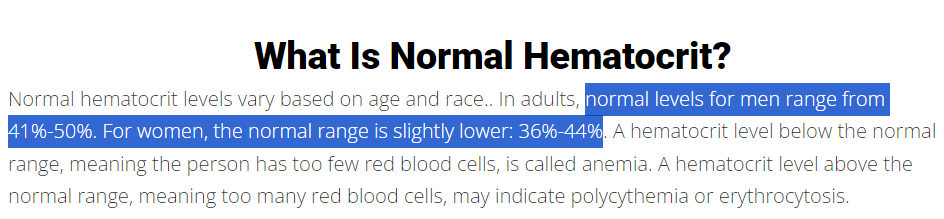

In [ ]:
def interpret_Hematocrit_by_sex(Hematocrit_value, sex):
    if sex == 0:  # Male
        if 41 <= Hematocrit_value <= 50:
            return 'Normal'
        elif Hematocrit_value < 41:
            return 'Low'
        else:
            return 'High'
    elif sex == 1:  # Female
        if 36 <= Hematocrit_value <= 44:
            return 'Normal'
        elif Hematocrit_value < 36:
            return 'Low'
        else:
            return 'High'

# Add a new column 'Hematocrit' based on 'L13-Hematocrit' values and 'Sex'
df_selected['Hematocrit'] = df_selected.apply(lambda row: interpret_Hematocrit_by_sex(row['L13-Hematocrit'], row['Sex']), axis=1)

###WBC

https://www.mountsinai.org/health-library/tests/wbc-count#:~:text=Normal%20Results,or%20may%20test%20different%20specimens.

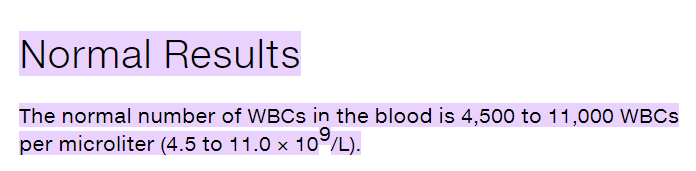

In [ ]:
def interpret_WBC(WBC_value):
    if WBC_value < 4.5:
        return 'Low'
    elif 4.5 <= WBC_value <= 11:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'albumin_level' based on 'L11-Albumin' values
df_selected['WBC'] = df_selected['L14-WBC'].apply(interpret_WBC)

###Platelet

https://www.ucsfhealth.org/medical-tests/platelet-count

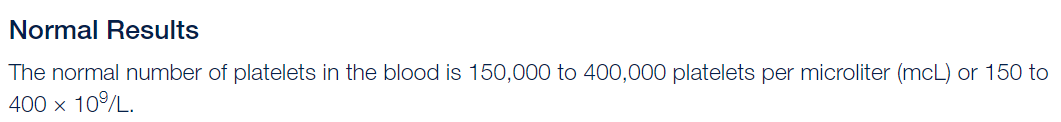

In [ ]:
def interpret_Platelet(Platelet_value):
    if Platelet_value < 150:
        return 'Low'
    elif 150 <= Platelet_value <= 400:
        return 'Normal'
    else:
        return 'High'

df_selected['Platelet'] = df_selected['L15-Platelet'].apply(interpret_Platelet)

###Blood-sugar

https://www.mountsinai.org/health-library/tests/blood-sugar-test-blood

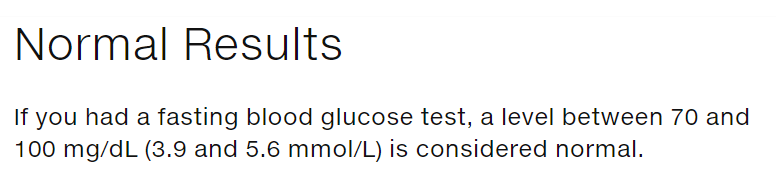

In [ ]:
def interpret_BloodSugar(BloodSugar_value):
    if BloodSugar_value < 70:
        return 'Low'
    elif 70 <= BloodSugar_value <= 100:
        return 'Normal'
    else:
        return 'High'

df_selected['Blood-sugar'] = df_selected['L19-Blood-sugar'].apply(interpret_BloodSugar)

###HbA1c

https://medlineplus.gov/lab-tests/hemoglobin-a1c-hba1c-test/#:~:text=To%20diagnose%20diabetes%20or%20prediabetes,A1C%20of%206.5%25%20or%20higher

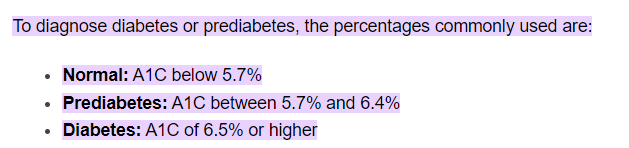

In [ ]:
def interpret_HbA1c(HbA1c_value):
    if HbA1c_value < 5.7:
        return 'Normal'
    elif 5.7 <= HbA1c_value <= 6.4:
        return 'Prediabetesl'
    else:
        return 'Diabetes'

df_selected['HbA1c'] = df_selected['L20-HbA1c'].apply(interpret_HbA1c)

###Triglyceride

https://medlineplus.gov/lab-tests/triglycerides-test/

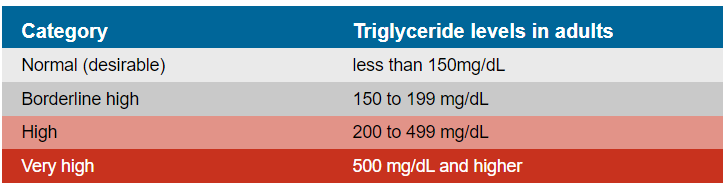

In [ ]:
def interpret_Triglyceride(Triglyceride_value):
    if Triglyceride_value < 150:
        return 'Normal'
    elif 150 <= Triglyceride_value <= 199:
        return 'Borderline high'
    elif 200 <= Triglyceride_value <= 499:
        return 'High'
    else:
        return 'Very high'

df_selected['Triglyceride'] = df_selected['L22-Triglyceride'].apply(interpret_Triglyceride)

###LDL-Cholesterol

https://medlineplus.gov/lab-tests/cholesterol-levels/

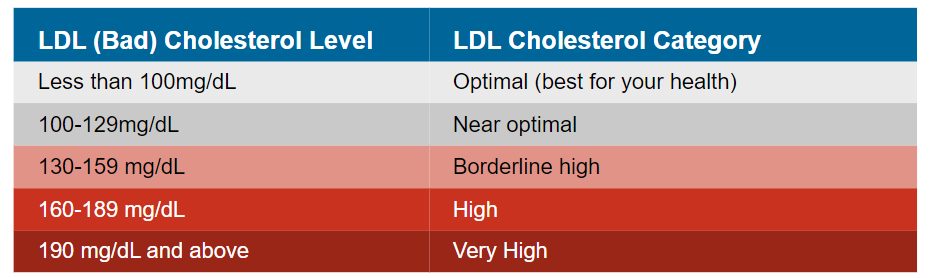

In [ ]:
def interpret_LDL(LDL_value):
    if LDL_value < 100:
        return 'Optimal'
    elif 100 <= LDL_value <= 129:
        return 'Near Optimal'
    elif 130 <= LDL_value <= 159:
        return 'Borderline High'
    elif 160 <= LDL_value <= 189:
        return 'High'
    else:
        return 'Very High'

df_selected['LDL-Cholesterol'] = df_selected['L23-LDL-Cholesterol'].apply(interpret_LDL)

###HDL-Cholesterol


https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean

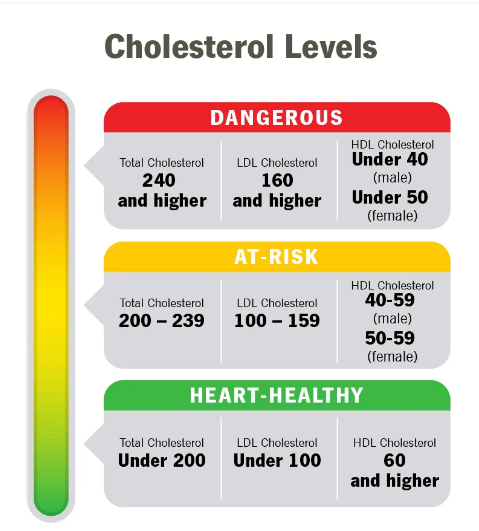

In [ ]:
def interpret_HDL_by_sex(HDL_value, sex):
    if sex == 0:  # Male
        if HDL_value < 40:
            return 'Dangerous'
        elif 40 <= HDL_value <= 59:
            return 'AT-Risk'
        else:
            return 'Heart-Healthy'
    elif sex == 1:  # Female
        if HDL_value <50:
            return 'Dangerous'
        elif 50<= HDL_value < 59:
            return 'AT-Risk'
        else:
            return 'Heart-Healthy'

df_selected['HDL-Cholesterol'] = df_selected.apply(lambda row: interpret_HDL_by_sex(row['L24-HDL-Cholesterol'], row['Sex']), axis=1)

###UrineProtein-Cr-ratio

https://www.healthline.com/health/kidney-disease/urine-protein-creatinine-ratio#levels

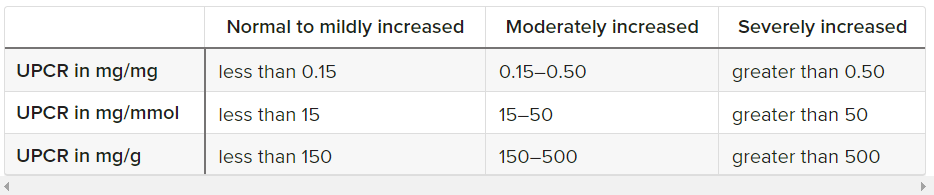

In [ ]:
def interpret_UPCR(UPCR_value):
    if UPCR_value < 150:
        return 'Normal'
    elif 150 <= UPCR_value <= 500:
        return 'Moderately'
    else:
        return 'Severely'

df_selected['UPCR'] = df_selected['L28-UrineProtein-Cr-ratio'].apply(interpret_UPCR)

### drug groups

In [ ]:
drug = ['G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G3M3-Fibrate', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G4M2-Febuxostat', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G4M3-Uricosuric-agent']
drug = df[drug]

In [ ]:
drug.head()

,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M3-Dihydropyridine-CCB,G1M6-MRA,G1M1-ACEI,G2M2-Metformin,G2M3-DPP4-inhibitor,G3M3-Fibrate,G4M1-Allopurinol,G1M9-Vasodilator,G1M8-Alpha-blocker,G4M2-Febuxostat,G1M4-Non-dihydropyridine-CCB,G5M1-Ketoanalog-amino-acid,G4M3-Uricosuric-agent
0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,90,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100,100,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35,0,1,35,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
drug.shape

(52620, 17)

In [ ]:
drug.describe()

,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M3-Dihydropyridine-CCB,G1M6-MRA,G1M1-ACEI,G2M2-Metformin,G2M3-DPP4-inhibitor,G3M3-Fibrate,G4M1-Allopurinol,G1M9-Vasodilator,G1M8-Alpha-blocker,G4M2-Febuxostat,G1M4-Non-dihydropyridine-CCB,G5M1-Ketoanalog-amino-acid,G4M3-Uricosuric-agent
count,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000
mean,8.887628,30.067104,1.047681,2.593330,9.167389,0.683390,6.630274,13.154257,4.558723,0.957944,4.957317,3.167256,4.171532,0.258989,1.772995,0.333694,0.109787
std,27.112374,43.033413,8.089661,14.695136,27.310031,7.339541,23.274212,32.222202,20.356311,9.380485,20.927421,16.323534,18.723921,4.904211,12.106452,5.319310,3.215718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,365.000000,400.000000,200.000000,252.000000,210.000000,195.000000,240.000000,315.000000,271.000000,240.000000,252.000000,210.000000,210.000000,119.000000,210.000000,105.000000,180.000000


In [ ]:
#import pandas as pd

# คอลัมน์ของยาทั้งหมด
#drug_columns  = ['G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
 #      'G1M5-Diuretic', 'G1M3-Dihydropyridine-CCB',
#       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
 #      'G3M3-Fibrate', 'G4M1-Allopurinol',
 #      'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
 #      'G4M2-Febuxostat', 'G1M4-Non-dihydropyridine-CCB',
 #     'G5M1-Ketoanalog-amino-acid', 'G4M3-Uricosuric-agent']

# สร้างฟังก์ชันเพื่อตรวจสอบการรับประทานยาของแต่ละคอลัมน์
#def check_medication(cell_value):
#    try:
        # แปลงค่าเป็นตัวเลข
 #       cell_value = int(cell_value)
 #       return 'Yes' if cell_value > 0 else 'No'
 #   except ValueError:
        # กรณีไม่สามารถแปลงได้
 #       return 'No'

# สร้างคอลัมน์ใหม่สำหรับการเก็บค่าที่แปลงแล้วของแต่ละยา
#for column in drug_columns:
 #    df_selected[f'{column}_taken'] = df_selected[column].apply(check_medication)


In [ ]:
import pandas as pd

# คอลัมน์ของยาทั้งหมด
drug_columns  = ['G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
      'G3M3-Fibrate', 'G4M1-Allopurinol',
      'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G4M2-Febuxostat', 'G1M4-Non-dihydropyridine-CCB',
      'G5M1-Ketoanalog-amino-acid', 'G4M3-Uricosuric-agent']

# สร้างคอลัมน์ใหม่สำหรับแต่ละยาที่ระบุว่าคนไข้กินหรือไม่กิน
for col in drug_columns:
   df_selected[col + '_taken'] = (df_selected[col] > 0).astype(int)

In [ ]:
df_selected[['G1M2-ARB','G1M2-ARB_taken','G3M1-Statin', 'G3M1-Statin_taken',
       'G5M2-NSAIDs','G5M2-NSAIDs_taken']].head()

,G1M2-ARB,G1M2-ARB_taken,G3M1-Statin,G3M1-Statin_taken,G5M2-NSAIDs,G5M2-NSAIDs_taken
0,90,1,0,0,0,0
1,90,1,90,1,0,0
2,100,1,100,1,34,1
3,35,1,0,0,1,1
4,100,1,0,0,15,1


### diag groups

In [ ]:
diag = [ 'D1-Hypertension', 'D2-Diabetes-mellitus','D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis',
       'D9-HCV-infection','D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy']
diag = df[diag]

In [ ]:
diag.describe()

,D1-Hypertension,D2-Diabetes-mellitus,D4-SLE,D5-Systemic-sclerosis,D6-Rheumatoid-arthritis,D9-HCV-infection,D11-Heart-failure,D12-Thalassemia,D13-Kidney-stone,D14-Valvular-heart-disease,D15-Solid-malignancy
count,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000
mean,0.273831,0.226606,0.009502,0.004371,0.016838,0.009977,0.005530,0.001558,0.020334,0.008837,0.043843
std,0.528612,0.471462,0.099529,0.066257,0.131874,0.099387,0.075431,0.039445,0.144075,0.094197,0.209699
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,6.000000,3.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000


In [ ]:
pd.DataFrame({
    'feature': diag.columns.values,
    'n_unique': diag.nunique().values, # ค่าไม่ซ้ำ
    'sample_unique': [diag[col].unique() for col in diag.columns]}
).round(3).reset_index(drop=True)

,feature,n_unique,sample_unique
0,D1-Hypertension,5,"[0, 1, 2, 3, 4]"
1,D2-Diabetes-mellitus,6,"[2, 1, 0, 3, 4, 6]"
2,D4-SLE,4,"[0, 1, 2, 3]"
3,D5-Systemic-sclerosis,3,"[0, 1, 2]"
4,D6-Rheumatoid-arthritis,5,"[0, 1, 2, 5, 3]"
5,D9-HCV-infection,2,"[0, 1]"
6,D11-Heart-failure,3,"[0, 1, 2]"
7,D12-Thalassemia,2,"[0, 1]"
8,D13-Kidney-stone,4,"[0, 1, 2, 3]"
9,D14-Valvular-heart-disease,3,"[0, 1, 2]"


In [ ]:
# คอลัมน์ของการตรวจสุขภาพทั้งหมด
#diag_columns = [ 'D1-Hypertension', 'D2-Diabetes-mellitus','D4-SLE',
#       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis',
#       'D9-HCV-infection','D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
 #      'D14-Valvular-heart-disease', 'D15-Solid-malignancy']

# สร้างฟังก์ชันเพื่อตรวจสอบการรับประทานยาของแต่ละคอลัมน์
#def check_diagnose(cell_value):
 #   try:
        # แปลงค่าเป็นตัวเลข
 #       cell_value = int(cell_value)
  #      return 'Yes' if cell_value > 0 else 'No'
   # except ValueError:
        # กรณีไม่สามารถแปลงได้
  #      return 'No'

# สร้างคอลัมน์ใหม่สำหรับการเก็บค่าที่แปลงแล้วของแต่ละยา
#for column in diag_columns:
 #    df_selected[f'{column}_check'] = df_selected[column].apply(check_diagnose)

In [ ]:
# คอลัมน์ของการตรวจสุขภาพทั้งหมด
diag_columns = [ 'D1-Hypertension', 'D2-Diabetes-mellitus','D4-SLE',
      'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis',
       'D9-HCV-infection','D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy']

# สร้างคอลัมน์ใหม่สำหรับแต่ละการตรวจที่ระบุว่าผู้ป่วยมีการตรวจหรือไม่มีการตรวจ
for col in diag_columns:
    df_selected[col + '_check'] = (df_selected[col] > 0).astype(int)

In [ ]:
df_selected[['D1-Hypertension','D1-Hypertension_check', 'D2-Diabetes-mellitus','D2-Diabetes-mellitus_check']].head()

,D1-Hypertension,D1-Hypertension_check,D2-Diabetes-mellitus,D2-Diabetes-mellitus_check
0,0,0,2,1
1,0,0,2,1
2,0,0,1,1
3,0,0,1,1
4,1,1,1,1


### Histogram

In [ ]:
data =['InPatient', 'OutPatient','Sex', 'Age_range', 'BMI_range', 'BSA_range', 'SBP','Slopes_Category',
    'G1M2-ARB_taken', 'G3M1-Statin_taken', 'G5M2-NSAIDs_taken',
       'G1M5-Diuretic_taken', 'G1M3-Dihydropyridine-CCB_taken',
       'G1M6-MRA_taken', 'G1M1-ACEI_taken', 'G2M2-Metformin_taken', 'G2M3-DPP4-inhibitor_taken',
       'G3M3-Fibrate_taken', 'G4M1-Allopurinol_taken',
       'G1M9-Vasodilator_taken', 'G1M8-Alpha-blocker_taken',
       'G4M2-Febuxostat_taken', 'G1M4-Non-dihydropyridine-CCB_taken',
       'G5M1-Ketoanalog-amino-acid_taken', 'G4M3-Uricosuric-agent_taken',
    'D1-Hypertension_check', 'D2-Diabetes-mellitus_check', 'D4-SLE_check',
       'D5-Systemic-sclerosis_check', 'D6-Rheumatoid-arthritis_check', 'D9-HCV-infection_check',
       'D11-Heart-failure_check', 'D12-Thalassemia_check', 'D13-Kidney-stone_check',
       'D14-Valvular-heart-disease_check', 'D15-Solid-malignancy_check',
    'eGFR_Category', 'BUN',
       'Sodium', 'Chloride', 'Bicarbonate', 'Uric',
       'Calcium', 'Phosphorus', 'Albumin', 'Hemoglobin',
       'Hematocrit', 'WBC', 'Platelet', 'Blood-sugar',
       'HbA1c','Triglyceride',
       'LDL-Cholesterol', 'HDL-Cholesterol',
       'UPCR']
data  = df_selected[data]
data.shape

(52620, 55)

In [ ]:
# เปลี่ยนชื่อคอลัมน์โดยใช้ str.replace()
data.columns = data.columns.str.replace('_taken', '').str.replace('_check', '').str.replace('_Category', '').str.replace('_range', '')

In [ ]:
# สร้าง mapping ของค่าที่จะแทนที่
replacement_mapping = {
    'Sex': {0: 'Male', 1: 'Female'},
    'NATNL' : {0: 'Thai', 1: 'Asian', 2: 'Caucasian', 3: 'Other'}
}

# ทำการ replace ค่าใน DataFrame
data.replace(replacement_mapping, inplace=True)

<ipython-input-79-4f1d8159d88a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(replacement_mapping, inplace=True)


In [ ]:
# เลือกคอลัมน์ที่มีชนิดข้อมูลเป็น string object
string_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

# แสดงรายชื่อคอลัมน์ที่เป็น string object
print(string_columns)

['Sex', 'Age', 'BMI', 'BSA', 'SBP', 'Slopes', 'eGFR', 'BUN', 'Sodium', 'Chloride', 'Bicarbonate', 'Uric', 'Calcium', 'Phosphorus', 'Albumin', 'Hemoglobin', 'Hematocrit', 'WBC', 'Platelet', 'Blood-sugar', 'HbA1c', 'Triglyceride', 'LDL-Cholesterol', 'HDL-Cholesterol', 'UPCR']


In [ ]:
# Assuming 'data' is your DataFrame, replace column names with your actual categorical columns
categorical_columns = ['Sex', 'Age', 'BMI', 'BSA', 'SBP', 'Slopes', 'eGFR',
                                   'BUN', 'Sodium', 'Chloride', 'Bicarbonate', 'Uric',
                                   'Calcium', 'Phosphorus', 'Albumin', 'Hemoglobin',
                                   'Hematocrit', 'WBC', 'Platelet', 'Blood-sugar', 'HbA1c',
                                   'Triglyceride', 'LDL-Cholesterol', 'HDL-Cholesterol', 'UPCR']
data[categorical_columns] = data[categorical_columns].astype('category')

<ipython-input-81-2e408fe83625>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[categorical_columns] = data[categorical_columns].astype('category')


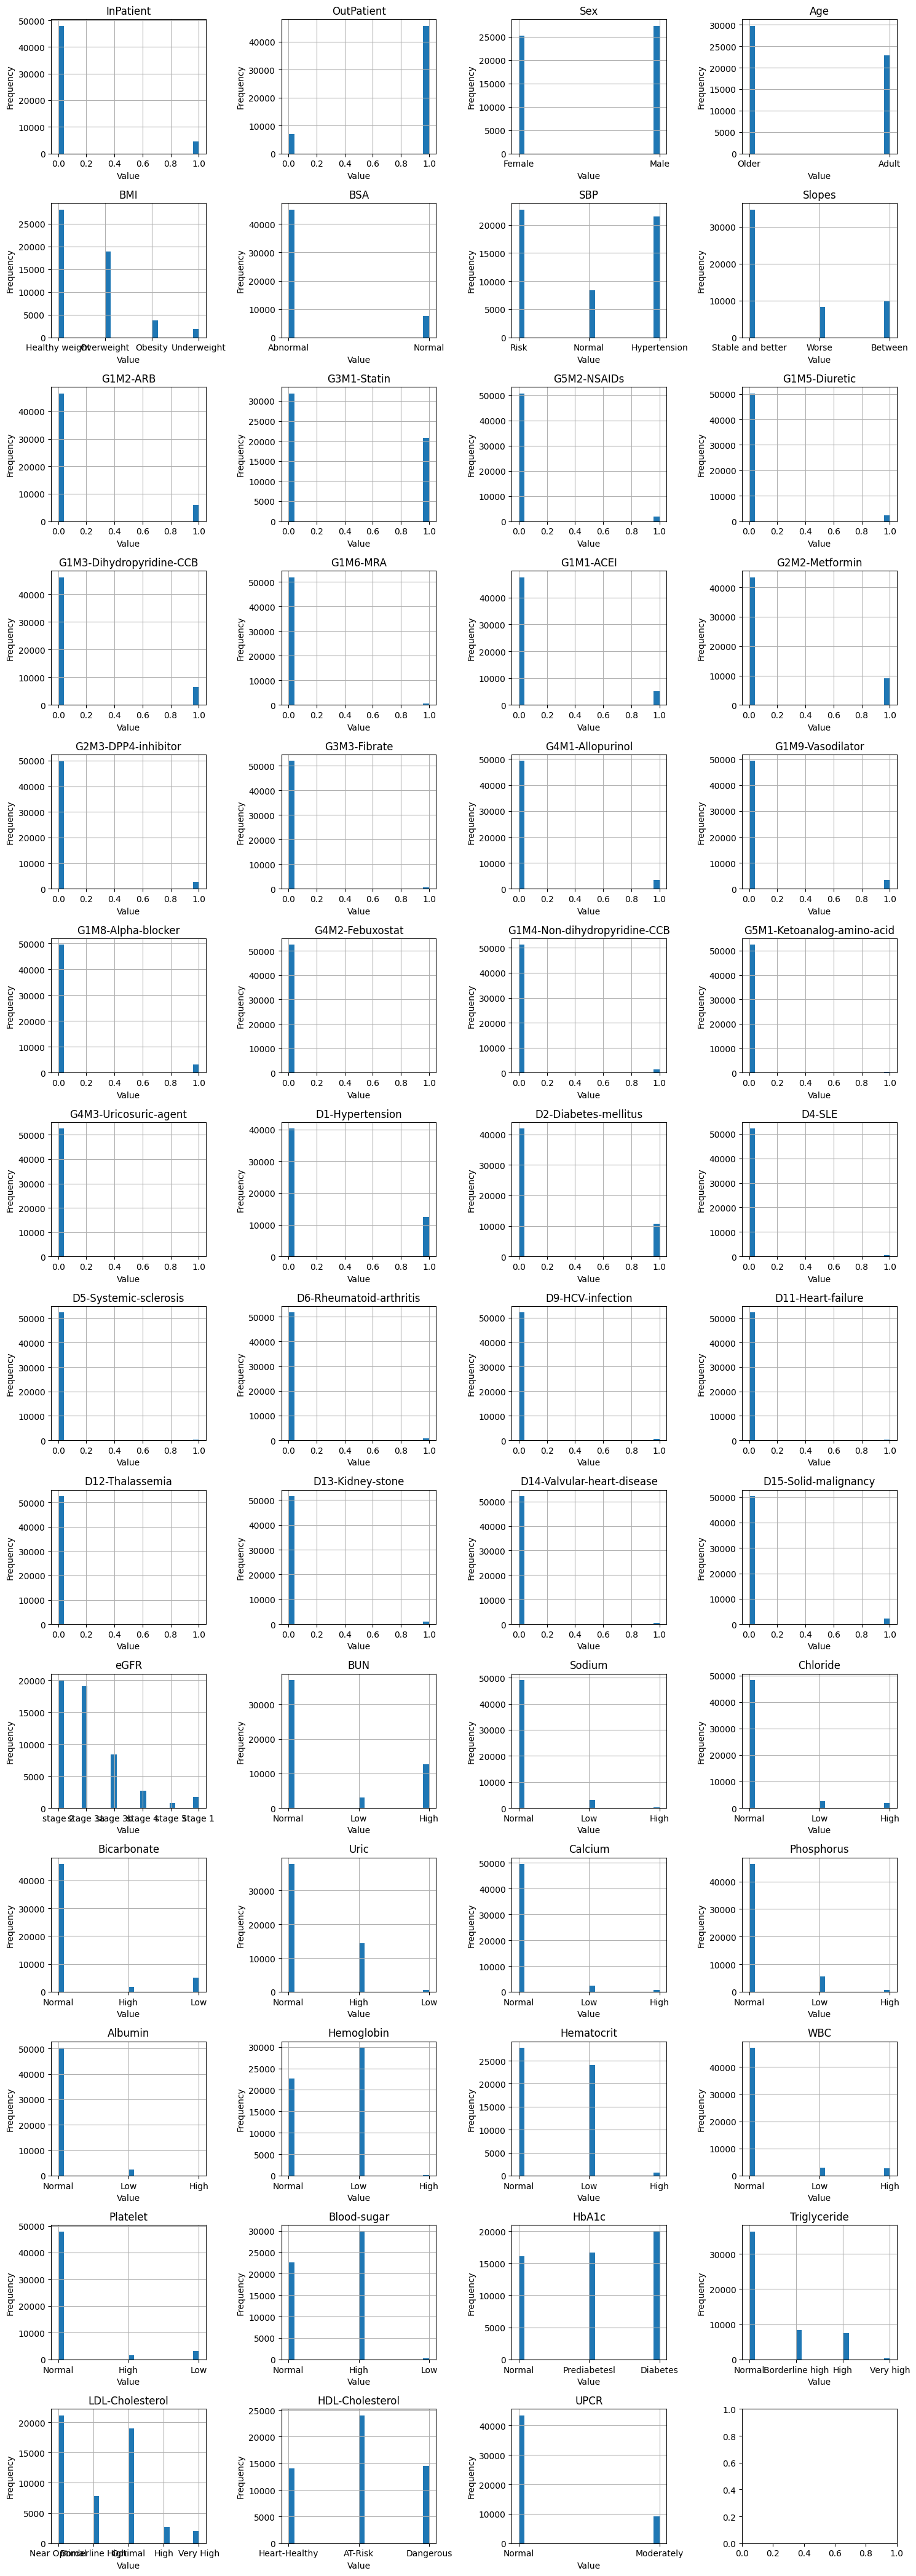

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
num_variables = len(data.columns)
num_rows = (num_variables // 4) + (num_variables % 4 > 0)
num_cols = min(num_variables, 4)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# Flatten axes if necessary
axes = axes.flatten()

# Plot histogram for each variable
for i, (col, ax) in enumerate(zip(data.columns, axes)):
    data[col].hist(bins=24, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

## SMOTE for Imbalanced Classification

In [ ]:
# One-hot encode categorical columns
dummy_data = pd.get_dummies(data, columns=categorical_columns)
dummy_data.shape

(52620, 108)

In [ ]:
# Find column names in dummy_data that start with "slope"
slope_columns = [col for col in dummy_data.columns if col.startswith('Slope')]

# Display the found columns
print(slope_columns)

['Slopes_Between', 'Slopes_Stable and better', 'Slopes_Worse']


In [ ]:
# Separate the features from the target for each column
df_target_slopes_better = dummy_data['Slopes_Stable and better']
df_target_slopes_between = dummy_data['Slopes_Between']
df_target_slopes_worse = dummy_data['Slopes_Worse']
df_target_egfr_1 = dummy_data['eGFR_stage 1']
df_target_egfr_2 = dummy_data['eGFR_stage 2']
df_target_egfr_3a = dummy_data['eGFR_stage 3a']
df_target_egfr_3b = dummy_data['eGFR_stage 3b']
df_target_egfr_4 = dummy_data['eGFR_stage 4']
df_target_egfr_5 = dummy_data['eGFR_stage 5']
df_feature = dummy_data.drop(['Slopes_Between', 'Slopes_Stable and better', 'Slopes_Worse',
                                   'eGFR_stage 1', 'eGFR_stage 2', 'eGFR_stage 3a',
                                   'eGFR_stage 3b', 'eGFR_stage 4', 'eGFR_stage 5'], axis=1)

In [ ]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample_slopes = SMOTE()
X_resampled_slopes_better, y_resampled_slopes_better = oversample_slopes.fit_resample(df_feature, df_target_slopes_better)

oversample_slopes = SMOTE()
X_resampled_slopes_between, y_resampled_slopes_between = oversample_slopes.fit_resample(df_feature, df_target_slopes_between)

oversample_slopes = SMOTE()
X_resampled_slopes_worse, y_resampled_slopes_worse = oversample_slopes.fit_resample(df_feature, df_target_slopes_worse)

In [ ]:
# Apply SMOTE separately for each target variable
from imblearn.over_sampling import SMOTE
oversample_egfr = SMOTE()
X_resampled_egfr_1, y_resampled_egfr_1 = oversample_egfr.fit_resample(df_feature, df_target_egfr_1)

oversample_egfr = SMOTE()
X_resampled_egfr_2, y_resampled_egfr_2 = oversample_egfr.fit_resample(df_feature, df_target_egfr_2)

oversample_egfr = SMOTE()
X_resampled_egfr_3a, y_resampled_egfr_3a = oversample_egfr.fit_resample(df_feature, df_target_egfr_3a)

oversample_egfr = SMOTE()
X_resampled_egfr_3b, y_resampled_egfr_3b = oversample_egfr.fit_resample(df_feature, df_target_egfr_3b)

oversample_egfr = SMOTE()
X_resampled_egfr_4, y_resampled_egfr_4 = oversample_egfr.fit_resample(df_feature, df_target_egfr_4)

oversample_egfr = SMOTE()
X_resampled_egfr_5, y_resampled_egfr_5 = oversample_egfr.fit_resample(df_feature, df_target_egfr_5)

In [ ]:
# Convert the resampled data to DataFrames for 'eGFR'
df_resampled_egfr_1 = pd.DataFrame(X_resampled_egfr_1, columns=df_feature.columns)
df_resampled_egfr_1['eGFR_stage_1'] = y_resampled_egfr_1

df_resampled_egfr_2 = pd.DataFrame(X_resampled_egfr_2, columns=df_feature.columns)
df_resampled_egfr_2['eGFR_stage_2'] = y_resampled_egfr_2

df_resampled_egfr_3a = pd.DataFrame(X_resampled_egfr_3a, columns=df_feature.columns)
df_resampled_egfr_3a['eGFR_stage_3a'] = y_resampled_egfr_3a

df_resampled_egfr_3b = pd.DataFrame(X_resampled_egfr_3b, columns=df_feature.columns)
df_resampled_egfr_3b['eGFR_stage_3b'] = y_resampled_egfr_3b

df_resampled_egfr_4 = pd.DataFrame(X_resampled_egfr_4, columns=df_feature.columns)
df_resampled_egfr_4['eGFR_stage_4'] = y_resampled_egfr_4

df_resampled_egfr_5 = pd.DataFrame(X_resampled_egfr_5, columns=df_feature.columns)
df_resampled_egfr_5['eGFR_stage_5'] = y_resampled_egfr_5

# Convert the resampled data to DataFrames for 'Slopes'
df_resampled_slopes_better = pd.DataFrame(X_resampled_slopes_better, columns=df_feature.columns)
df_resampled_slopes_better['Slopes_Stable_and_better'] = y_resampled_slopes_better

df_resampled_slopes_between = pd.DataFrame(X_resampled_slopes_between, columns=df_feature.columns)
df_resampled_slopes_between['Slopes_Between'] = y_resampled_slopes_between

df_resampled_slopes_worse = pd.DataFrame(X_resampled_slopes_worse, columns=df_feature.columns)
df_resampled_slopes_worse['Slopes_Worse'] = y_resampled_slopes_worse

In [ ]:
df_resampled = pd.concat([df_resampled_egfr_1, df_resampled_egfr_2, df_resampled_egfr_3a,
                      df_resampled_egfr_3b, df_resampled_egfr_4, df_resampled_egfr_5,
                      df_resampled_slopes_better, df_resampled_slopes_between, df_resampled_slopes_worse],axis=1)
df_resampled = df_resampled.loc[:,~df_resampled.columns.duplicated()]

In [ ]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103674 entries, 0 to 103673
Columns: 108 entries, InPatient to Slopes_Worse
dtypes: float64(107), uint8(1)
memory usage: 84.7 MB


In [ ]:
# Assuming df_resampled is your DataFrame
df_resampled = df_resampled.astype(float)

In [ ]:
df_resampled.head()

,InPatient,OutPatient,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M3-Dihydropyridine-CCB,G1M6-MRA,G1M1-ACEI,G2M2-Metformin,...,UPCR_Normal,eGFR_stage_1,eGFR_stage_2,eGFR_stage_3a,eGFR_stage_3b,eGFR_stage_4,eGFR_stage_5,Slopes_Stable_and_better,Slopes_Between,Slopes_Worse
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


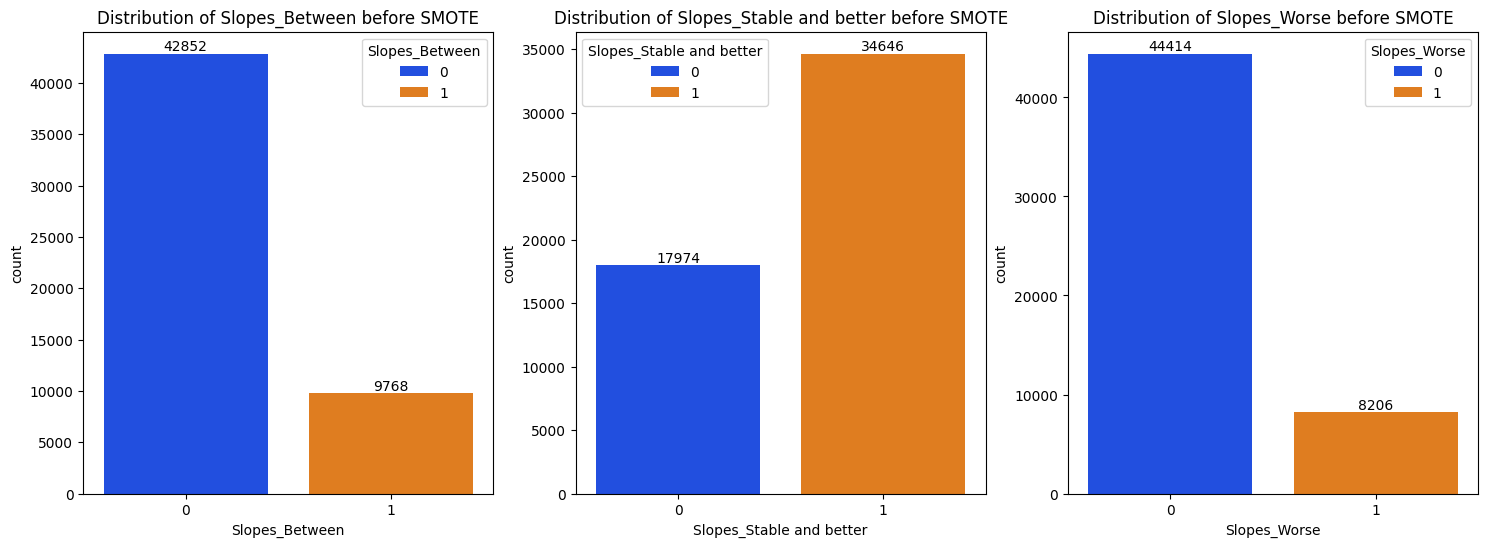

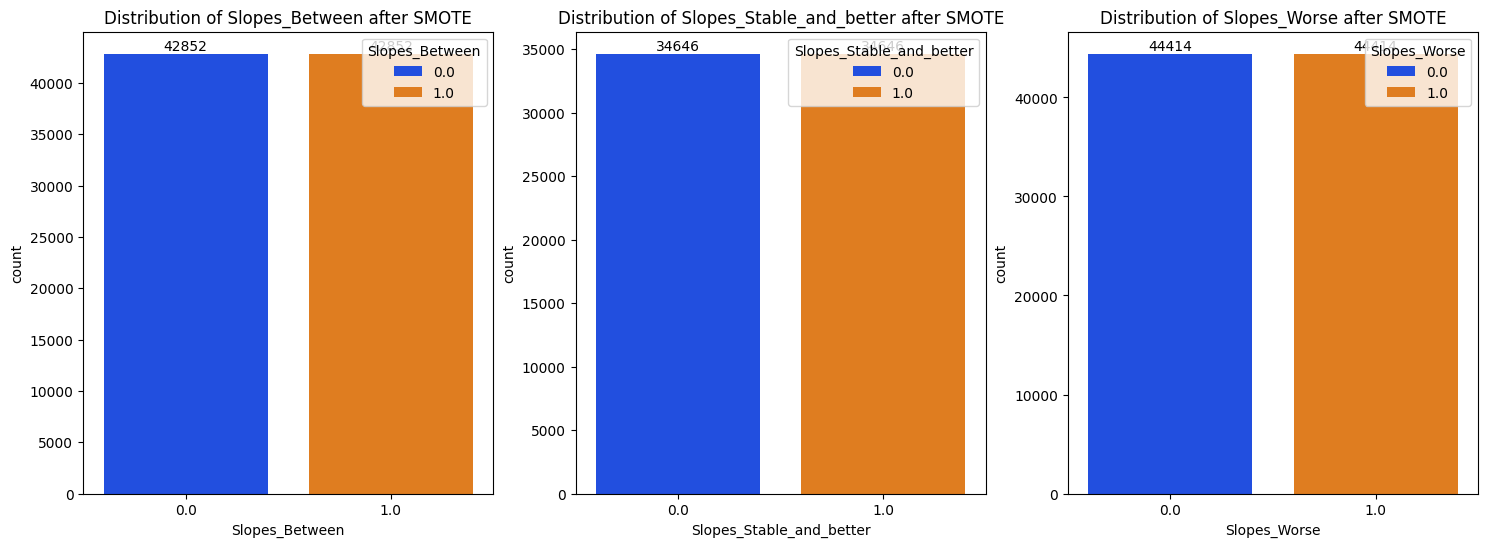

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution before SMOTE
plt.figure(figsize=(18, 6))

# Plot distribution before SMOTE - Slopes_Between
plt.subplot(1, 3, 1)
g0_before_between = sns.countplot(dummy_data, x='Slopes_Between', hue='Slopes_Between', palette='bright', dodge=False)
g0_before_between.bar_label(g0_before_between.containers[0])
g0_before_between.bar_label(g0_before_between.containers[1])
plt.title('Distribution of Slopes_Between before SMOTE')

# Plot distribution before SMOTE - Slopes_Stable_and_better
plt.subplot(1, 3, 2)
g0_before_stable = sns.countplot(dummy_data, x='Slopes_Stable and better', hue='Slopes_Stable and better', palette='bright', dodge=False)
g0_before_stable.bar_label(g0_before_stable.containers[0])
g0_before_stable.bar_label(g0_before_stable.containers[1])
plt.title('Distribution of Slopes_Stable and better before SMOTE')

# Plot distribution before SMOTE - Slopes_Worse
plt.subplot(1, 3, 3)
g0_before_worse = sns.countplot(dummy_data, x='Slopes_Worse', hue='Slopes_Worse', palette='bright', dodge=False)
g0_before_worse.bar_label(g0_before_worse.containers[0])
g0_before_worse.bar_label(g0_before_worse.containers[1])
plt.title('Distribution of Slopes_Worse before SMOTE')

plt.show()

# Plot distribution after SMOTE
plt.figure(figsize=(18, 6))

# Plot distribution after SMOTE - Slopes_Between
plt.subplot(1, 3, 1)
g0_after_between = sns.countplot(df_resampled, x='Slopes_Between', hue='Slopes_Between', palette='bright', dodge=False)
g0_after_between.bar_label(g0_after_between.containers[0])
g0_after_between.bar_label(g0_after_between.containers[1])
plt.title('Distribution of Slopes_Between after SMOTE')

# Plot distribution after SMOTE - Slopes_Stable_and_better
plt.subplot(1, 3, 2)
g0_after_stable = sns.countplot(df_resampled, x='Slopes_Stable_and_better', hue='Slopes_Stable_and_better', palette='bright', dodge=False)
g0_after_stable.bar_label(g0_after_stable.containers[0])
g0_after_stable.bar_label(g0_after_stable.containers[1])
plt.title('Distribution of Slopes_Stable_and_better after SMOTE')

# Plot distribution after SMOTE - Slopes_Worse
plt.subplot(1, 3, 3)
g0_after_worse = sns.countplot(df_resampled, x='Slopes_Worse', hue='Slopes_Worse', palette='bright', dodge=False)
g0_after_worse.bar_label(g0_after_worse.containers[0])
g0_after_worse.bar_label(g0_after_worse.containers[1])
plt.title('Distribution of Slopes_Worse after SMOTE')

plt.show()

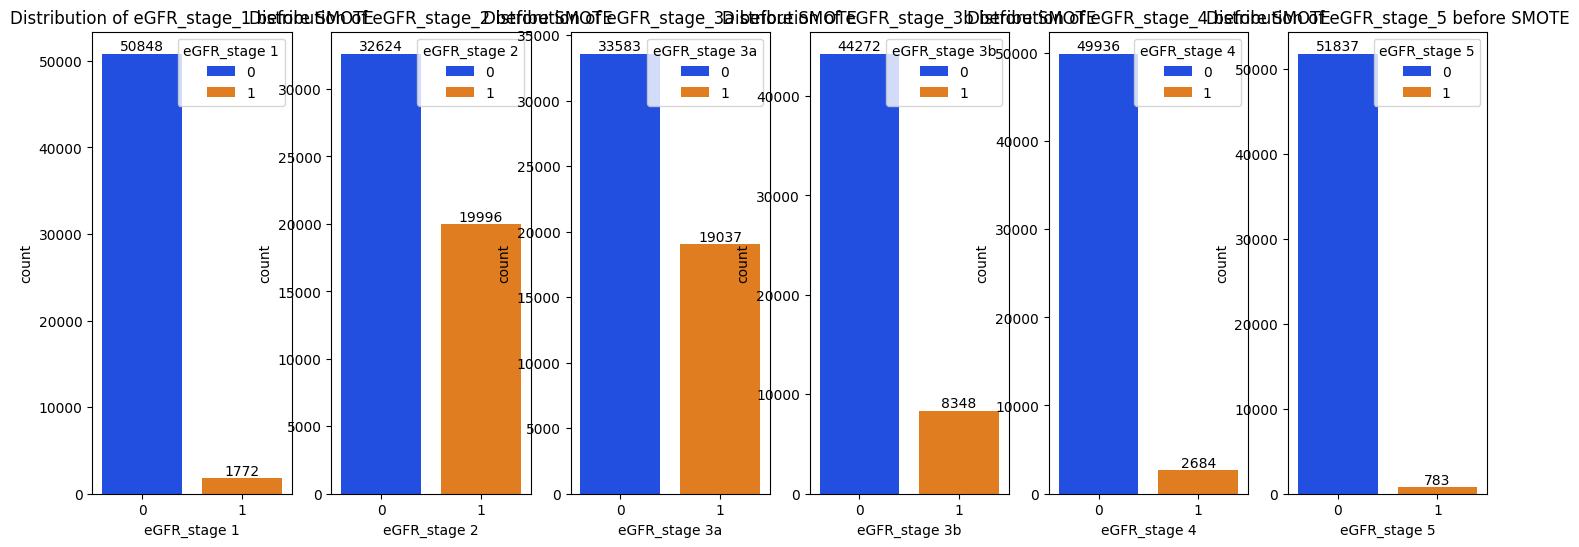

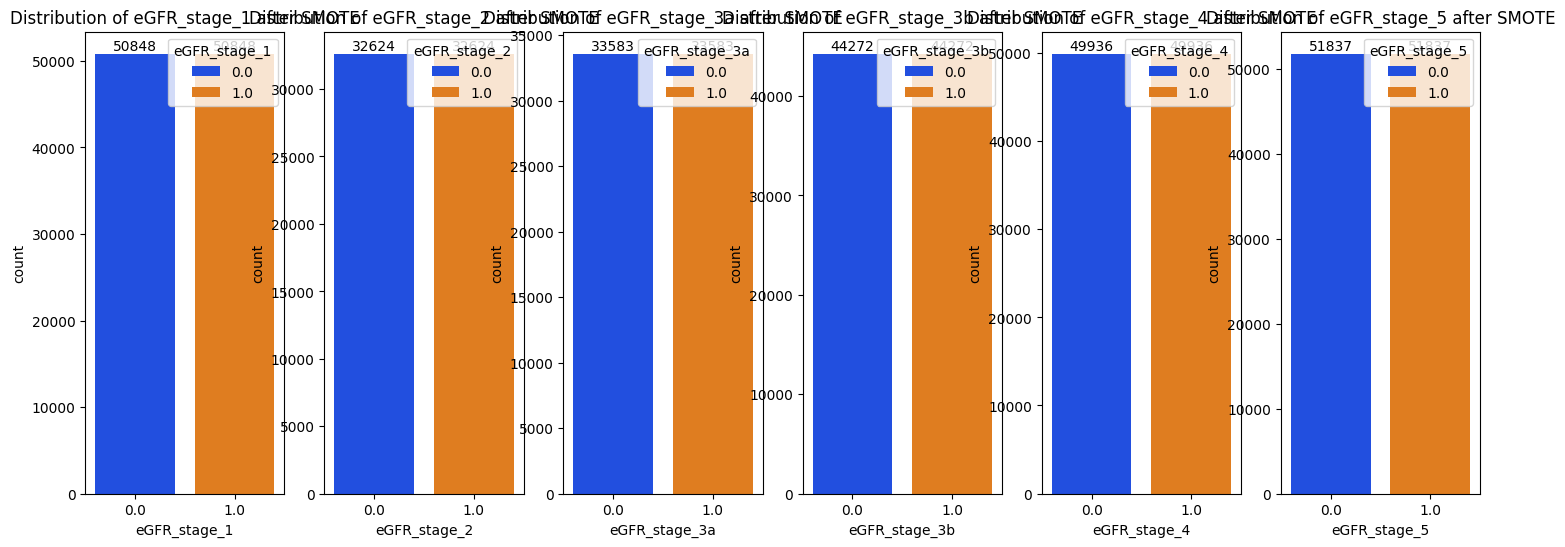

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution before SMOTE
plt.figure(figsize=(18, 6))

# Plot distribution before SMOTE - eGFR_stage_1
plt.subplot(1, 6, 1)
g0_before_stage_1 = sns.countplot(dummy_data, x='eGFR_stage 1', hue='eGFR_stage 1', palette='bright', dodge=False)
g0_before_stage_1.bar_label(g0_before_stage_1.containers[0])
g0_before_stage_1.bar_label(g0_before_stage_1.containers[1])
plt.title('Distribution of eGFR_stage_1 before SMOTE')

# Plot distribution before SMOTE - eGFR_stage_2
plt.subplot(1, 6, 2)
g0_before_stage_2 = sns.countplot(dummy_data, x='eGFR_stage 2', hue='eGFR_stage 2', palette='bright', dodge=False)
g0_before_stage_2.bar_label(g0_before_stage_2.containers[0])
g0_before_stage_2.bar_label(g0_before_stage_2.containers[1])
plt.title('Distribution of eGFR_stage_2 before SMOTE')

# Plot distribution before SMOTE - eGFR_stage_3a
plt.subplot(1, 6, 3)
g0_before_stage_3a = sns.countplot(dummy_data, x='eGFR_stage 3a', hue='eGFR_stage 3a', palette='bright', dodge=False)
g0_before_stage_3a.bar_label(g0_before_stage_3a.containers[0])
g0_before_stage_3a.bar_label(g0_before_stage_3a.containers[1])
plt.title('Distribution of eGFR_stage_3a before SMOTE')

# Plot distribution before SMOTE - eGFR_stage_3b
plt.subplot(1, 6, 4)
g0_before_stage_3b = sns.countplot(dummy_data, x='eGFR_stage 3b', hue='eGFR_stage 3b', palette='bright', dodge=False)
g0_before_stage_3b.bar_label(g0_before_stage_3b.containers[0])
g0_before_stage_3b.bar_label(g0_before_stage_3b.containers[1])
plt.title('Distribution of eGFR_stage_3b before SMOTE')

# Plot distribution before SMOTE - eGFR_stage_4
plt.subplot(1, 6, 5)
g0_before_stage_4 = sns.countplot(dummy_data, x='eGFR_stage 4', hue='eGFR_stage 4', palette='bright', dodge=False)
g0_before_stage_4.bar_label(g0_before_stage_4.containers[0])
g0_before_stage_4.bar_label(g0_before_stage_4.containers[1])
plt.title('Distribution of eGFR_stage_4 before SMOTE')

# Plot distribution before SMOTE - eGFR_stage_5
plt.subplot(1, 6, 6)
g0_before_stage_5 = sns.countplot(dummy_data, x='eGFR_stage 5', hue='eGFR_stage 5', palette='bright', dodge=False)
g0_before_stage_5.bar_label(g0_before_stage_5.containers[0])
g0_before_stage_5.bar_label(g0_before_stage_5.containers[1])
plt.title('Distribution of eGFR_stage_5 before SMOTE')
plt.show()

# Plot distribution after SMOTE
plt.figure(figsize=(18, 6))

# Plot distribution after SMOTE - eGFR_stage_1
plt.subplot(1, 6, 1)
g0_after_stage_1 = sns.countplot(df_resampled, x='eGFR_stage_1', hue='eGFR_stage_1', palette='bright', dodge=False)
g0_after_stage_1.bar_label(g0_after_stage_1.containers[0])
g0_after_stage_1.bar_label(g0_after_stage_1.containers[1])
plt.title('Distribution of eGFR_stage_1 after SMOTE')

# Plot distribution after SMOTE - eGFR_stage_2
plt.subplot(1, 6, 2)
g0_after_stage_2 = sns.countplot(df_resampled, x='eGFR_stage_2', hue='eGFR_stage_2', palette='bright', dodge=False)
g0_after_stage_2.bar_label(g0_after_stage_2.containers[0])
g0_after_stage_2.bar_label(g0_after_stage_2.containers[1])
plt.title('Distribution of eGFR_stage_2 after SMOTE')

# Plot distribution after SMOTE - eGFR_stage_3a
plt.subplot(1, 6, 3)
g0_after_stage_3a = sns.countplot(df_resampled, x='eGFR_stage_3a', hue='eGFR_stage_3a', palette='bright', dodge=False)
g0_after_stage_3a.bar_label(g0_after_stage_3a.containers[0])
g0_after_stage_3a.bar_label(g0_after_stage_3a.containers[1])
plt.title('Distribution of eGFR_stage_3a after SMOTE')

# Plot distribution after SMOTE - eGFR_stage_3b
plt.subplot(1, 6, 4)
g0_after_stage_3b = sns.countplot(df_resampled, x='eGFR_stage_3b', hue='eGFR_stage_3b', palette='bright', dodge=False)
g0_after_stage_3b.bar_label(g0_after_stage_3b.containers[0])
g0_after_stage_3b.bar_label(g0_after_stage_3b.containers[1])
plt.title('Distribution of eGFR_stage_3b after SMOTE')

# Plot distribution after SMOTE - eGFR_stage_4
plt.subplot(1, 6, 5)
g0_after_stage_4 = sns.countplot(df_resampled, x='eGFR_stage_4', hue='eGFR_stage_4', palette='bright', dodge=False)
g0_after_stage_4.bar_label(g0_after_stage_4.containers[0])
g0_after_stage_4.bar_label(g0_after_stage_4.containers[1])
plt.title('Distribution of eGFR_stage_4 after SMOTE')

# Plot distribution after SMOTE - eGFR_stage_
plt.subplot(1, 6, 6)
g0_after_stage_5 = sns.countplot(df_resampled, x='eGFR_stage_5', hue='eGFR_stage_5', palette='bright', dodge=False)
g0_after_stage_5.bar_label(g0_after_stage_5.containers[0])
g0_after_stage_5.bar_label(g0_after_stage_5.containers[1])
plt.title('Distribution of eGFR_stage_5 after SMOTE')

plt.show()

In [ ]:
# แปลงเป็น boolean เนื่องจากหน่วยความจำน้อยกว่าทำให้รันเร็วขึ้นได้
dummy_df = df_resampled.astype(bool)
dummy_df.head()

,InPatient,OutPatient,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M3-Dihydropyridine-CCB,G1M6-MRA,G1M1-ACEI,G2M2-Metformin,...,UPCR_Normal,Slopes_Stable_and_better,Slopes_Between,Slopes_Worse,eGFR_stage_1,eGFR_stage_2,eGFR_stage_3a,eGFR_stage_3b,eGFR_stage_4,eGFR_stage_5
0,False,True,True,False,False,False,False,False,False,False,...,True,True,False,False,False,True,False,False,False,False
1,False,True,True,True,False,False,False,False,False,False,...,True,False,False,True,False,True,False,False,False,False
2,False,True,True,True,True,False,False,False,False,False,...,True,True,False,False,False,True,False,False,False,False
3,False,True,True,False,True,True,False,False,False,False,...,True,True,False,False,False,True,False,False,False,False
4,False,True,True,False,True,False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,False


In [ ]:
#dummy_df.to_csv('dummy_df.csv')

##  Apriori algorithm

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 999)
pd.options.display.float_format = "{:.3f}".format

# Apriori min support
min_support = 0.5

# Max length of apriori n-grams
max_len = 10

#frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1) #df = dummy_df
#rules = association_rules(frequent_items, metric='lift', min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Rule

In [ ]:
#New code from outlier file

In [ ]:
# ตรวจสอบค่า unique ในคอลัมน์ consequents ที่ขึ้นต้นด้วย frozenset({'Slopes'})
#slopes_values = rules[rules['consequents'].apply(lambda x: x.startswith("frozenset({'Slopes"))]['consequents'].unique()
#print(slopes_values)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# ตรวจสอบค่า unique ในคอลัมน์ consequents ที่ขึ้นต้นด้วย frozenset({'eGFR'})
#eGFR_values = rules[rules['consequents'].apply(lambda x: x.startswith("frozenset({'eGFR"))]['consequents'].unique()
#print(eGFR_values)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#desired_frozenset = "frozenset({'Slopes_Stable and better'})"
#Slopes_Stable_and_better = rules[rules['consequents'].apply(lambda x: desired_frozenset in x)].sort_values(by='confidence', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
rules_1 = pd.read_csv('/content/drive/MyDrive/ULckdresearch2023/rules_1.csv', index_col=0) # dummy_df
rules_1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,frozenset({'OutPatient'}),frozenset({'G3M1-Statin'}),0.908617,0.576036,0.554025,0.609745,1.058519,0.030628,1.086376,0.604967
1,frozenset({'G3M1-Statin'}),frozenset({'OutPatient'}),0.576036,0.908617,0.554025,0.961788,1.058519,0.030628,2.391485,0.130397
2,frozenset({'OutPatient'}),frozenset({'Sex_Female'}),0.908617,0.648600,0.604790,0.665616,1.026234,0.015460,1.050885,0.279739
3,frozenset({'Sex_Female'}),frozenset({'OutPatient'}),0.648600,0.908617,0.604790,0.932454,1.026234,0.015460,1.352893,0.072747
4,frozenset({'OutPatient'}),frozenset({'Sex_Male'}),0.908617,0.673226,0.627573,0.690690,1.025941,0.015868,1.056462,0.276698


In [4]:
rules_1.shape

(9602374, 10)

In [6]:
# ตรวจสอบค่า unique ในคอลัมน์ consequents ที่ขึ้นต้นด้วย frozenset({'Slopes'})
slopes_values = rules_1[rules_1['consequents'].apply(lambda x: x.startswith("frozenset({'Slopes"))]['consequents'].unique()
print(slopes_values[:5])

["frozenset({'Slopes_Stable_and_better'})" "frozenset({'Slopes_Between'})"
 "frozenset({'Slopes_Worse'})"
 "frozenset({'Slopes_Worse', 'BSA_Abnormal'})"
 "frozenset({'Slopes_Between', 'Sodium_Normal'})"]


In [7]:
eGFR_values =rules_1[rules_1['consequents'].apply(lambda x: x.startswith("frozenset({'eGFR"))]['consequents'].unique()
print(eGFR_values[:5])

["frozenset({'eGFR_stage_2'})" "frozenset({'eGFR_stage_3a'})"
 "frozenset({'eGFR_stage_3b'})" "frozenset({'eGFR_stage_4'})"
 "frozenset({'eGFR_stage_3a', 'Age_Older'})"]


##### Slopes_Stable_and_better

In [38]:
Slopes_better_values = rules_1[rules_1['consequents'].str.startswith("frozenset({'Slopes_Stable_and_better'})")]
Slopes_better_values.shape

(3181, 10)

In [40]:
better_rules = Slopes_better_values.query('support >= 0.5 and confidence >= 0.7').sort_values(by='confidence', ascending=False)
# แสดงผลลัพธ์
better_rules.shape

(3029, 10)

In [41]:
better_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
443334,"frozenset({'BUN_Normal', 'Uric_Normal', 'Calci...",frozenset({'Slopes_Stable_and_better'}),0.651349,0.665818,0.500058,0.767726,1.153057,0.066378,1.438741,0.380726
421110,"frozenset({'BUN_Normal', 'Bicarbonate_Normal',...",frozenset({'Slopes_Stable_and_better'}),0.652565,0.665818,0.500203,0.766518,1.151243,0.065713,1.431296,0.378123
444474,"frozenset({'Uric_Normal', 'Albumin_Normal', 'W...",frozenset({'Slopes_Stable_and_better'}),0.656211,0.665818,0.502633,0.765963,1.150409,0.065716,1.427904,0.380303
437580,"frozenset({'BUN_Normal', 'Bicarbonate_Normal',...",frozenset({'Slopes_Stable_and_better'}),0.654127,0.665818,0.501013,0.765925,1.150353,0.065483,1.427674,0.377889
195578,"frozenset({'BUN_Normal', 'OutPatient', 'Albumi...",frozenset({'Slopes_Stable_and_better'}),0.653954,0.665818,0.500868,0.765908,1.150326,0.065454,1.427565,0.377641


In [42]:
#better_rules.to_csv('slopes_better.csv')

##### Slopes_Between

In [43]:
Slopes_between_values = rules_1[rules_1['consequents'].str.startswith("frozenset({'Slopes_Between'})")]
Slopes_between_values.shape

(631, 10)

In [44]:
between_rules = Slopes_between_values.query('support >= 0.5 and confidence >= 0.7').sort_values(by='confidence', ascending=False)
between_rules.shape

(49, 10)

In [83]:
between_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
14540,"frozenset({'eGFR_stage_3b', 'Calcium_Normal'})",frozenset({'Slopes_Between'}),0.558086,0.586666,0.500260,0.896386,1.527933,0.172850,3.989174,0.781874
15620,"frozenset({'Albumin_Normal', 'eGFR_stage_3b'})",frozenset({'Slopes_Between'}),0.562253,0.586666,0.503550,0.895593,1.526581,0.173695,3.958866,0.787992
938,frozenset({'eGFR_stage_3b'}),frozenset({'Slopes_Between'}),0.572969,0.586666,0.511633,0.892950,1.522075,0.175491,3.861122,0.803226
548876,"frozenset({'eGFR_stage_3a', 'Albumin_Normal', ...",frozenset({'Slopes_Between'}),0.621400,0.586666,0.500878,0.806048,1.373946,0.136324,2.131110,0.718884
8290,"frozenset({'eGFR_stage_3a', 'BSA_Abnormal'})",frozenset({'Slopes_Between'}),0.625200,0.586666,0.503926,0.806023,1.373905,0.137142,2.130842,0.726114


In [45]:
#between_rules.to_csv('slopes_between.csv')

##### Slopes_Worse

In [46]:
Slopes_worse_values = rules_1[rules_1['consequents'].str.startswith("frozenset({'Slopes_Worse'})")]
Slopes_worse_values.shape

(303, 10)

In [47]:
worse_rules = Slopes_worse_values.query('support >= 0.5 and confidence >= 0.7').sort_values(by='confidence', ascending=False)
# แสดงผลลัพธ์
worse_rules.shape

(27, 10)

In [48]:
worse_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
15640,"frozenset({'Albumin_Normal', 'eGFR_stage_3b'})",frozenset({'Slopes_Worse'}),0.562253,0.571599,0.500154,0.889554,1.556254,0.178771,3.878828,0.816525
945,frozenset({'eGFR_stage_3b'}),frozenset({'Slopes_Worse'}),0.572969,0.571599,0.508710,0.887849,1.553271,0.181201,3.819851,0.834126
15117,"frozenset({'eGFR_stage_3a', 'Phosphorus_Normal'})",frozenset({'Slopes_Worse'}),0.635521,0.571599,0.504485,0.793814,1.388759,0.141222,2.077735,0.768034
464634,"frozenset({'eGFR_stage_3a', 'Albumin_Normal', ...",frozenset({'Slopes_Worse'}),0.632897,0.571599,0.500781,0.791252,1.384277,0.139018,2.052238,0.756195
123020,"frozenset({'eGFR_stage_3a', 'Albumin_Normal', ...",frozenset({'Slopes_Worse'}),0.632049,0.571599,0.500019,0.791109,1.384027,0.138741,2.050833,0.754096


In [49]:
#worse_rules.to_csv('slopes_worse.csv')

##### eGFR_stage_1

In [50]:
eGFR_stage_1 = rules_1[rules_1['consequents'].str.startswith("frozenset({'eGFR_stage_1'})")]
eGFR_stage_1.shape

(0, 10)

##### eGFR_stage_2

In [51]:
eGFR_stage_2 = rules_1[rules_1['consequents'].str.startswith("frozenset({'eGFR_stage_2'})")]
eGFR_stage_2.shape

(5112, 10)

In [52]:
# ใช้ query เพื่อเลือกรายการที่มี support ที่เริ่มต้นที่ 0.5 แต่น้อยกว่า 0.6
eGFR_stage_2_value = eGFR_stage_2.query('support >= 0.5 and confidence >= 0.7').sort_values(by='confidence', ascending=False)

# แสดงผลลัพธ์
eGFR_stage_2_value.shape

(5097, 10)

In [53]:
eGFR_stage_2_value.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11141,"frozenset({'Slopes_Worse', 'Sodium_Normal'})",frozenset({'eGFR_stage_2'}),0.553495,0.685321,0.500106,0.903543,1.318422,0.120784,3.262368,0.540907
14547,"frozenset({'Slopes_Worse', 'Calcium_Normal'})",frozenset({'eGFR_stage_2'}),0.554642,0.685321,0.500733,0.902803,1.317343,0.120625,3.237548,0.540906
15626,"frozenset({'Slopes_Worse', 'Albumin_Normal'})",frozenset({'eGFR_stage_2'}),0.558838,0.685321,0.503993,0.901859,1.315965,0.121010,3.206391,0.544248
940,frozenset({'Slopes_Worse'}),frozenset({'eGFR_stage_2'}),0.571599,0.685321,0.513340,0.898076,1.310446,0.121611,3.087394,0.552989
12266,"frozenset({'Slopes_Between', 'Chloride_Normal'})",frozenset({'eGFR_stage_2'}),0.565706,0.685321,0.502334,0.887978,1.295710,0.114644,2.809070,0.525502


In [54]:
#eGFR_stage_2_value.to_csv('eGFR_stage_2_rule.csv')

##### eGFR_stage_3a

In [56]:
eGFR_stage_3a = rules_1[rules_1['consequents'].str.startswith("frozenset({'eGFR_stage_3a'})")]
eGFR_stage_3a.shape

(3947, 10)

In [57]:
# ใช้ query เพื่อเลือกรายการที่มี support ที่เริ่มต้นที่ 0.5 แต่น้อยกว่า 0.6
eGFR_stage_3a_value = eGFR_stage_3a.query('support >= 0.5 and confidence >= 0.7').sort_values(by='confidence', ascending=False)

# แสดงผลลัพธ์
eGFR_stage_3a_value.shape

(3914, 10)

In [58]:
eGFR_stage_3a_value.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
515782,"frozenset({'Slopes_Worse', 'Albumin_Normal', '...",frozenset({'eGFR_stage_3a'}),0.534464,0.676071,0.500559,0.936564,1.385304,0.139224,5.106372,0.597454
464636,"frozenset({'Slopes_Worse', 'Albumin_Normal', '...",frozenset({'eGFR_stage_3a'}),0.534840,0.676071,0.500781,0.936320,1.384943,0.139191,5.086811,0.597533
487072,"frozenset({'Slopes_Worse', 'Albumin_Normal', '...",frozenset({'eGFR_stage_3a'}),0.538554,0.676071,0.503984,0.935810,1.384188,0.139883,5.046385,0.601489
120007,"frozenset({'Slopes_Worse', 'Calcium_Normal', '...",frozenset({'eGFR_stage_3a'}),0.535062,0.676071,0.500434,0.935283,1.383409,0.138694,5.005287,0.596096
123021,"frozenset({'Slopes_Worse', 'Albumin_Normal', '...",frozenset({'eGFR_stage_3a'}),0.534753,0.676071,0.500019,0.935047,1.383060,0.138488,4.987119,0.595309


In [59]:
#eGFR_stage_3a_value.to_csv('eGFR_stage_3a_rule.csv')

##### eGFR_stage_3b

In [60]:
eGFR_stage_3b = rules_1[rules_1['consequents'].str.startswith("frozenset({'eGFR_stage_3b'})")]
eGFR_stage_3b.shape

(328, 10)

In [66]:
eGFR_stage_3b_value = eGFR_stage_3b.query('support >= 0.5 and confidence >= 0.7').sort_values(by='confidence', ascending=False)

# แสดงผลลัพธ์
eGFR_stage_3b_value.shape

(5, 10)

In [64]:
eGFR_stage_3b_value

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
15638,"frozenset({'Slopes_Worse', 'Albumin_Normal'})",frozenset({'eGFR_stage_3b'}),0.558838,0.572969,0.500154,0.894989,1.562020,0.179957,4.066550,0.815582
944,frozenset({'Slopes_Worse'}),frozenset({'eGFR_stage_3b'}),0.571599,0.572969,0.508710,0.889976,1.553271,0.181201,3.881265,0.831459
14542,"frozenset({'Calcium_Normal', 'Slopes_Between'})",frozenset({'eGFR_stage_3b'}),0.571898,0.572969,0.500260,0.874736,1.526673,0.172580,3.409060,0.805839
15621,"frozenset({'Albumin_Normal', 'Slopes_Between'})",frozenset({'eGFR_stage_3b'}),0.576393,0.572969,0.503550,0.873622,1.524727,0.173294,3.378984,0.812416
939,frozenset({'Slopes_Between'}),frozenset({'eGFR_stage_3b'}),0.586666,0.572969,0.511633,0.872102,1.522075,0.175491,3.338845,0.829843


In [ ]:
#eGFR_stage_3b_value.to_csv('eGFR_stage_3b_rule.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### eGFR_stage_4

In [67]:
eGFR_stage_4 = rules_1[rules_1['consequents'].str.startswith("frozenset({'eGFR_stage_4})")]
eGFR_stage_4.shape

(0, 10)

##### eGFR_stage_5

In [69]:
eGFR_stage_5 = rules_1[rules_1['consequents'].str.startswith("frozenset({'eGFR_stage_5'})")]
eGFR_stage_5.shape

(0, 10)

อ้างอิง :
1. https://www.kaggle.com/code/raphael2711/customer-personnas-with-apriori-algorithm
2. https://www.kaggle.com/code/theoviel/dealing-with-class-imbalance-with-smote?fbclid=IwAR2Z937KCWyseqWCH3IsDMEARpER_S89EwhFhUsvecl2Ha0HjeCdToUm5a8
3. https://www.kaggle.com/code/galipsekeroglu/modeling-xai-smote-featureselection-modeltuning
4.https://machinelearningmastery.com/imbalanced-multiclass-classification-with-the-e-coli-dataset/